# Regression

## Data set: https://archive.ics.uci.edu/dataset/242/energy+efficiency
+ The dataset contains 768 samples and 8 features, aiming to predict two responses. For this regression problem, the model is built on one of the two target variables.

## Objectives (Business Understanding):
+ The aim of this regression analysis is to build a model that helps architects and engineers design **energy-efficient buildings** by predicting heating load based on the given parameters.
+ This helps in maintaining sustainability by identifying design configurations that **minimise heating load** and **reduce overall energy consumption** and costs.

## Objectives of the Regression Analysis:
+ Predict the **heating load (y1)** based on **8 physical and design features (X1 - X8)** of a building.
+ Develop and compare two regression models, a Linear Regression model and a Polynomial Regression model that includes non-linear terms.
+ Analyse whether polynomial relationships improve accuracy using R² and RMSE metrics.

## Data Exploration (Data Understanding & Preparation)
#### The dataset comprises of 768 instances, 8 features and 2 target variables. (One target variable y1 is considered for this regression problem)

#### Features (independent variables)
+ X1 : Relative Compactness
+ X2 : Surface Area
+ X3 : Wall Area
+ X4 : Roof Area
+ X5 : Overall Height
+ X6 : Orientation
+ X7 : Glazing Area
+ X8 : Glazing Area Distribution
  
#### Targets (dependent variables)
+ y1 : Heating Load
+ y2 : Cooling Load

In [3]:
import pandas as pd 

# Read the Excel file from the data folder
df = pd.read_excel("data/ENB2012_data.xlsx")

# Save it as a CSV file
df.to_csv("data/ENB2012_data.csv", index=False)

# Read the energy consumption csv file
df = pd.read_csv('data/ENB2012_data.csv')

# Print the type of the variable df
print("Type: ", type(df))

Type:  <class 'pandas.core.frame.DataFrame'>


In [4]:
# Print the shape of the data frame
print("\nShape: ", df.shape)

# Print information on the data frame
print("\nInfo: ")
df.info()


Shape:  (768, 10)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Note**:
+ The dataset contains 768 rows and 10 columns.
+ Every column has 768 non-null values, which means there are no missing entries in any column.

In [5]:
# Print the first 5 rows of the data frame
print("The first 5 rows of the dataframe: ")
df.head()

The first 5 rows of the dataframe: 


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# Describe the data 
print("\nDescription of the data: ")
df.describe()


Description of the data: 


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Note**:
+ No missing values and most features are continuous.
+ Variables like surface are much larger that others like glazing, so scaling could be uselful.

In [7]:
# Interpret the correlation between the targets and other variables
print("\nCorrelation: ")
df.corr()


Correlation: 


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,5.878473e-17,-2.096261e-15,-1.896390e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.066832e-17,3.623317e-15,2.441409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.510469e-17,-8.647953e-17,2.077332e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.591507e-17,-1.753224e-15,-1.068485e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.876676e-17,-1.977685e-16,-9.524163e-17,0.889430,0.895785
X6,5.878473e-17,-3.066832e-17,-2.510469e-17,-5.591507e-17,4.876676e-17,1.000000e+00,-9.366058e-16,-2.608346e-16,-0.002587,0.014290
X7,-2.096261e-15,3.623317e-15,-8.647953e-17,-1.753224e-15,-1.977685e-16,-9.366058e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-1.896390e-16,2.441409e-15,2.077332e-16,-1.068485e-15,-9.524163e-17,-2.608346e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [8]:
# Correlation between the target variable y1 (heating load) and other attributes 
corr_with_target = df.corr()['Y1'].sort_values(ascending=False)
print(corr_with_target)

Y1    1.000000
Y2    0.975862
X5    0.889430
X1    0.622272
X3    0.455671
X7    0.269842
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64


**Note**:
+ Overall Height (X5) and Relative Compactness (X1) have the strongest correlations with Heating Load, confirming they are key predictors.
+ Orientation (X6) and Glazing Distribution (X8) show near zero correlation, indicating little predictive power.

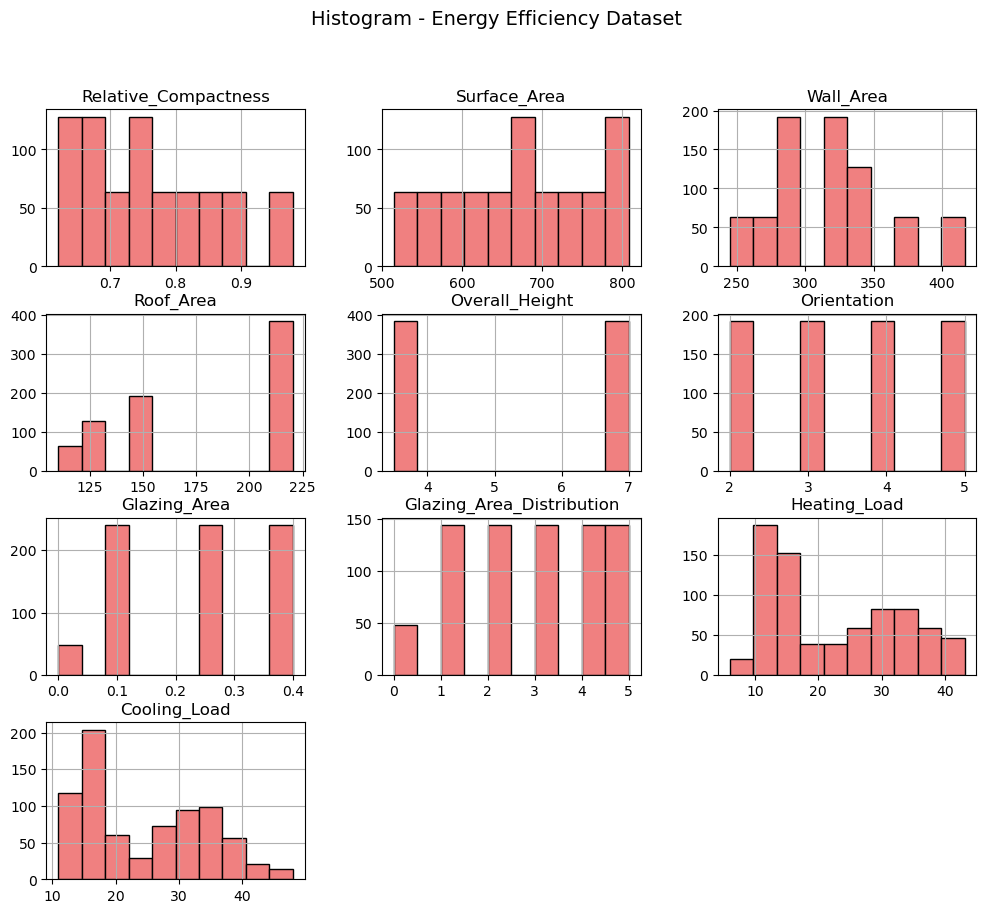

In [108]:
import matplotlib.pyplot as plt

# Draw the histogram 
df.hist(figsize=(12, 10), color='lightcoral', edgecolor='black')
plt.suptitle('Histogram - Energy Efficiency Dataset', fontsize=14)
plt.savefig('plots/EnergyEfficiencyHistogram.png')
plt.show()

<Figure size 1400x1400 with 0 Axes>

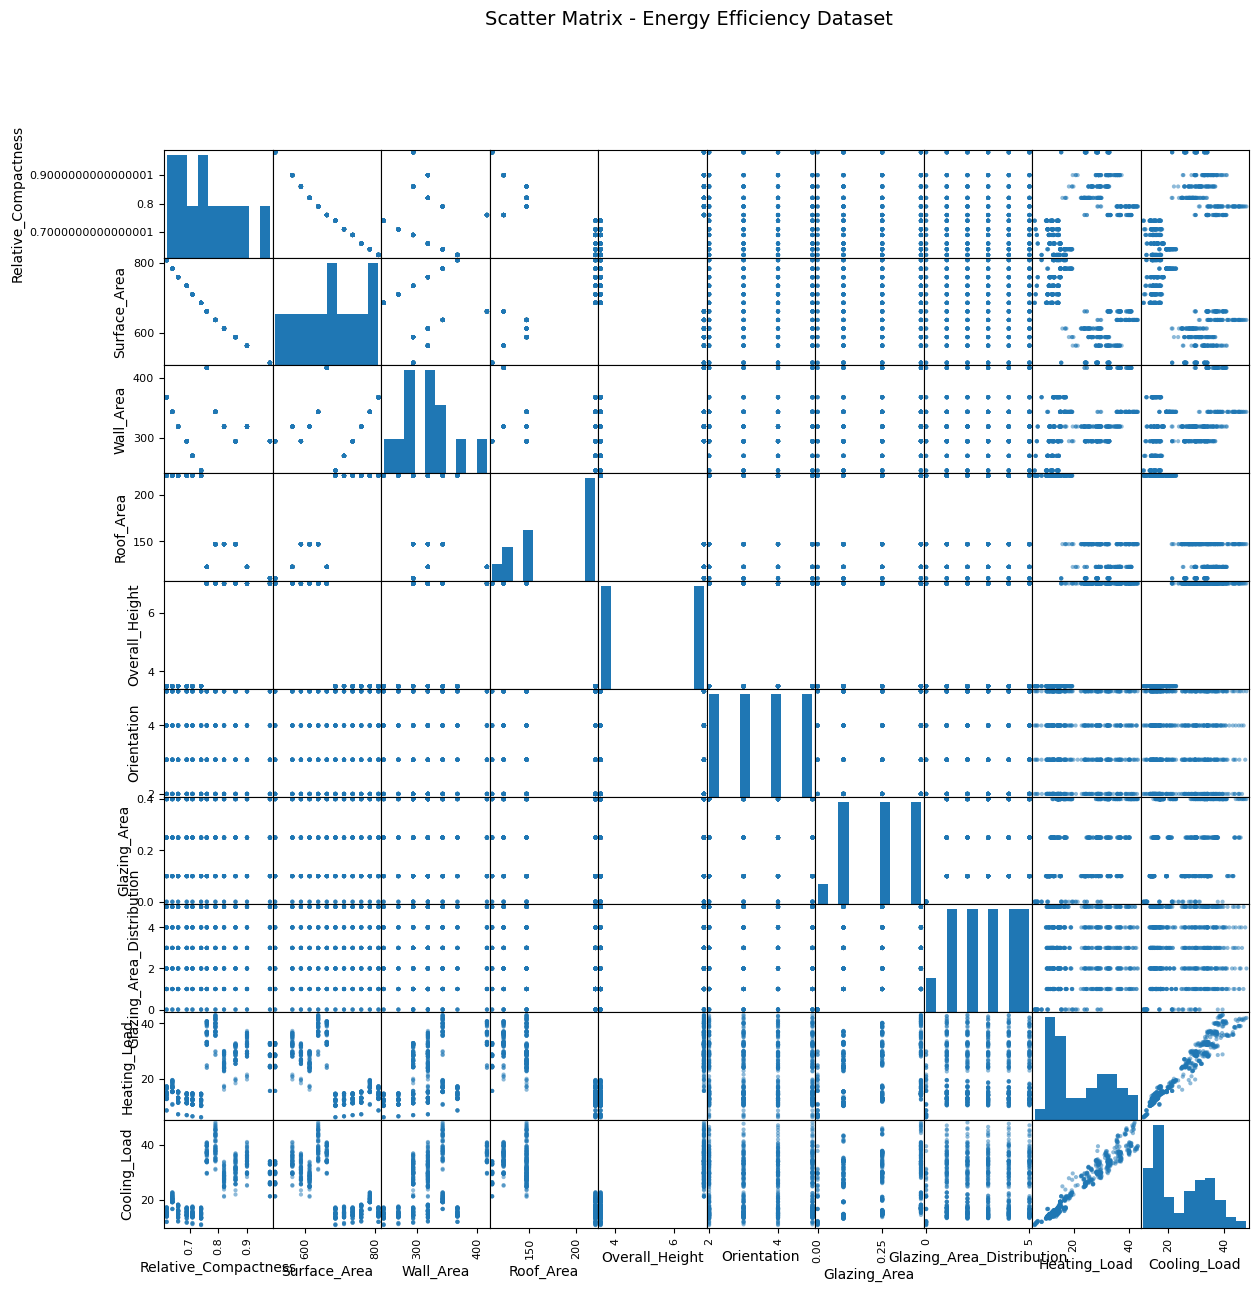

In [97]:
from pandas.plotting import scatter_matrix

# Draw scatter matrix
plt.figure(figsize=(14, 14))
scatter_matrix(df, figsize=(14, 14))

plt.suptitle('Scatter Matrix - Energy Efficiency Dataset', fontsize=14)
plt.savefig('plots/EnergyEfficiencyScatterMatrix.png')
plt.show()

**Note**:
+ The features (X1 - X5) are strongly correlated.
+ Orientation and glazing distribution are categorical variables with no clear linear relationships.
+ Glazing area (X7) shows a mild positive association with energy loads.
+ y1 and y2 are almost perfectly correlated, reflecting similar thermal characteristics.
+ Non-linear patterns between compactness, height, and heating load justify exploring polynomial regression.

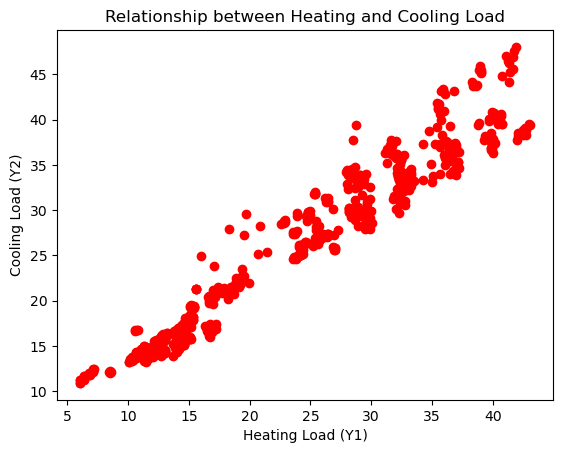

In [11]:
# Scatter plot - Relationship between target variables
plt.scatter(df['Y1'], df['Y2'], color='red')
plt.xlabel('Heating Load (Y1)')
plt.ylabel('Cooling Load (Y2)')
plt.title('Relationship between Heating and Cooling Load')
plt.savefig('plots/EnergyEfficiencyTargets.png')
plt.show()

**Note**:
+ The strong diagonal trend confirms that buildings with high heating demand also exhibit high cooling demand, reflecting consistent thermal behavior. Thus, it is good to focus on a single target variable y1

In [12]:
# Renaming the columns for better readability
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
              'Roof_Area','Overall_Height', 'Orientation', 'Glazing_Area', 
              'Glazing_Area_Distribution','Heating_Load', 'Cooling_Load']
print("\nData frame head after column names change: ")
df.head()


Data frame head after column names change: 


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [13]:
# Determine the input and target variables - X (input) y (target)
X = df.drop(['Heating_Load', 'Cooling_Load'], axis='columns')
y = df.Heating_Load

# Convert the categorical variables "Orientation" and "Glazing_Area_Distribution" using one hot encoding:
X = pd.get_dummies(X, columns=['Orientation', 'Glazing_Area_Distribution'])
print(list(X.columns))

['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Orientation_2', 'Orientation_3', 'Orientation_4', 'Orientation_5', 'Glazing_Area_Distribution_0', 'Glazing_Area_Distribution_1', 'Glazing_Area_Distribution_2', 'Glazing_Area_Distribution_3', 'Glazing_Area_Distribution_4', 'Glazing_Area_Distribution_5']


**Note:** 
+ I'm considering only heating load (y1) as the target variable to avoid redundancy since y1 and y2 are almost perfectly correlated.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [50]:
# Print the shape of X and y after data preparation.
print("Final shape of X:", X_scaled.shape)
print("Final shape of y:", y.shape)

Final shape of X: (768, 16)
Final shape of y: (768,)


## Modeling - Linear Regression and Polynomial Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial regression model - Create the polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Fit linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

## Evaluation of the Linear and Polynomial models

In [103]:
# Evaluate the model - Linear Regression
print("Linear Regression Model Results: ")
# Determine the values of slope, intercept, R squared
print("\nSlope: ", model.coef_)
print("\nIntercept: ", model.intercept_)
print('\nR squared_Train: ', model.score(X_train,y_train))
print('R squared_Test: ', model.score(X_test,y_test))

yhat = model.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, yhat, squared=False))

Linear Regression Model Results: 

Slope:  [-7.39631059e+00 -1.20838317e+14  5.98476902e+13  1.23919129e+14
  7.28064471e+00  2.28775348e+00  4.91103957e+13  4.91103957e+13
  4.91103957e+13  4.91103957e+13 -4.33404607e+13 -6.98843929e+13
 -6.98843929e+13 -6.98843929e+13 -6.98843929e+13 -6.98843929e+13]

Intercept:  22.242676339338622

R squared_Train:  0.9294527774503643
R squared_Test:  0.9044362009861022
RMSE:  3.112631043965278


**Note:**
+ The linear regression model explains 92% of the variation in Heating Load for the training data.
+ On unseen data, the model explains about same of the variation, meaning the model generalizes well and is not overfitting.
+ On average, the model’s predictions deviate by about 2.8 units from the actual heating load.

In [102]:
# Evaluate the model - Polynomial Regression
print("Polynomial Regression Model Results: ")
# Determine the values of slope, intercept, R squared
print("\nSlope: ", poly_model.coef_)
print("\nIntercept: ", poly_model.intercept_)
print('\nR squared_Train: ', poly_model.score(X_train_poly,y_train))
print('R squared_Test: ', poly_model.score(X_test_poly,y_test))

yhat = poly_model.predict(X_test_poly)
print('RMSE: ', mean_squared_error(y_test, yhat, squared=False))

Polynomial Regression Model Results: 

Slope:  [-8.64616204e+10 -2.48978129e+12  1.18217323e+12  1.83653324e+12
 -6.16595420e+11  2.71036454e+11  2.38511398e+12 -1.98043116e+11
  7.56233612e+11  6.20232745e+11  2.47589646e+11 -9.44096437e+11
  1.17320892e+12  1.50447664e+11  5.29988835e+11 -1.02391518e+12
 -1.95529068e+03  8.32603840e+11 -4.12364374e+11 -3.07697983e+11
  4.44659763e+11  2.90513992e-01  3.61729975e+10  3.61729975e+10
  3.61729975e+10  3.61729975e+10  1.22008527e+11  1.96732839e+11
  1.96732839e+11  1.96732839e+11  1.96732839e+11  1.96732839e+11
  1.98375459e+12 -9.48416013e+11  9.49181361e+11 -1.31738189e+11
 -3.12404268e+09 -7.09643061e+10  1.04875113e+11 -1.29847932e+11
 -2.21610757e+10  1.20592897e+11  3.24337944e+11  2.62591203e+11
  5.60162887e+10  1.59021975e+11 -1.24970980e+11 -1.68786878e+10
 -1.19081621e+12  3.27237325e+11  1.54724713e+09  1.29800737e+11
  4.27126067e+10  1.58964078e+11  1.05629922e+11  1.38828604e+11
  1.59524792e+11  1.90106150e+11  2.9241667

**Note:**
+ The R squared value increased drastically (0.998), showing that polynomial regression explains nearly 100% of the variance in heating load.
+ The RMSE decreased from 3.1 to 0.47

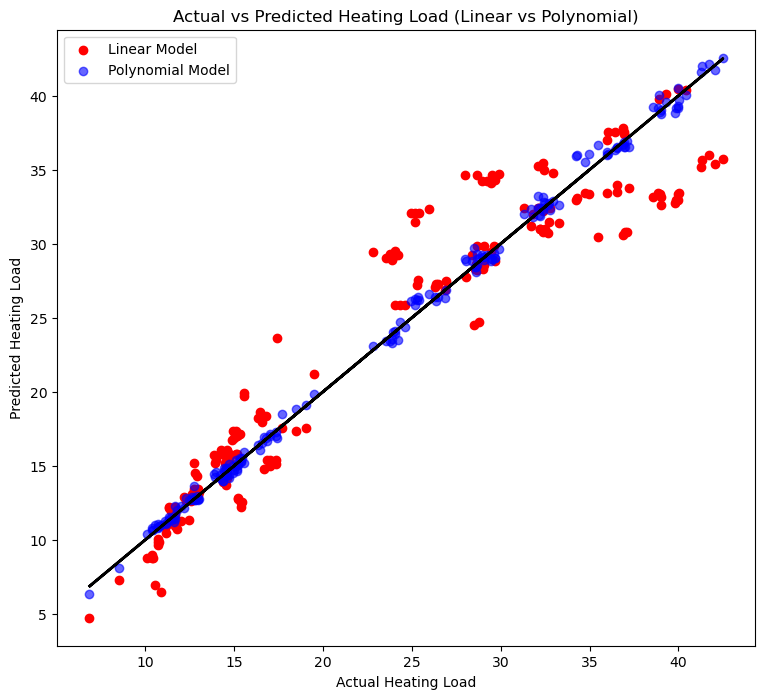

In [105]:
# Scatterplot - Visual Representation of the linear and polynomial model
plt.figure(figsize=(9, 8))
plt.scatter(y_test, model.predict(X_test), color='red', label='Linear Model')
plt.scatter(y_test, poly_model.predict(X_test_poly), color='blue', alpha=0.6, label='Polynomial Model')
plt.plot(y_test, y_test, color='black', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Linear vs Polynomial)")
plt.legend()
plt.savefig('plots/EnergyEfficiencyModelsEvaluation.png')
plt.show()

**Note:**
+ The scatter plot shows that polynomial regression predictions align almost perfectly with the actual values (blue points close to the diagonal line), while the linear model predictions (red points) deviate more widely, particularly at extreme heating load values. This confirms the improved accuracy of the polynomial model.

## Conclusion

#### From the regression analyses, we can conclude that the Polynomial regression is appropriate, effective, and produces the most accurate model for predicting the heating load.